## Predicting Heart Disease Using machine Learning
This notebook looks into using various python-based machine learning and datascience libraries in an attempt to build
a machine learning model, capable of predicting whether or no notsomeone has heart disease based on their medical attributes

We are going to take the following aooroach
1. Problem definition
2. data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the cleaveland data from the UCI Machine learning Repository:https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a person has heart disease
during the prrof of concept, we will pursue the project

## 4. Features

This is where you get different information about the features in your data

**Create data dictionary**

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
* trestbpd: resting blood pressure
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping 
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: have disease or not 1=Yes 0r 0=No

## Preparing the tools
we're going to use pandas, matplotlib and numpy for data analysis and maniputaion.

In [1]:
# import all the tools we need

#Regular EDA(explorative data analysis) and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#To make our plots appear inside the notebook
%matplotlib inline 

# models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load Data

In [5]:
df = pd.read_csv("data\heart-disease.csv")
df.shape #(rows, cols)

(303, 14)

## Data Exploration (Exploratory data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the datasets 
you are working with

1. What question(s) are you trying to solve or answer?
2. What kind of data do we have and how do we treat different types
3. What;s missing from the data and how should you deal with it
4. Where are the outliers and why should you care about them
5. How can you add, change or remove features to get more out of the data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#let's find out how many of each class there are
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

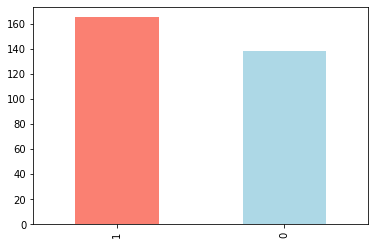

In [8]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
#get different information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
#find out if there are missing values. If there are, how many per column

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
#Let's try to compare coulunms with each other

#Heart disease frequency according to sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
#Compare sex column with target column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


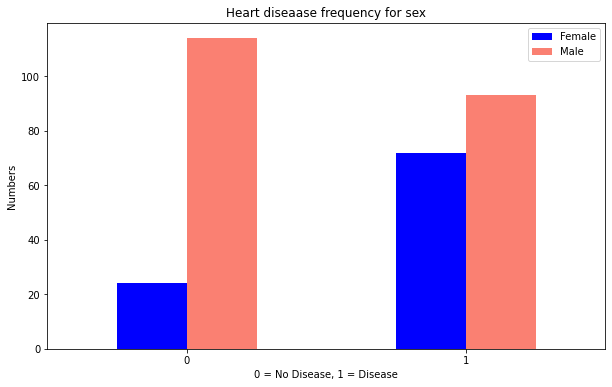

In [15]:
#Create a plot of crosstabs
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["blue", "salmon"], 
                                   figsize=(10, 6))
plt.title("Heart diseaase frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Numbers")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age Vs. Max Heart rate for Heart Disease

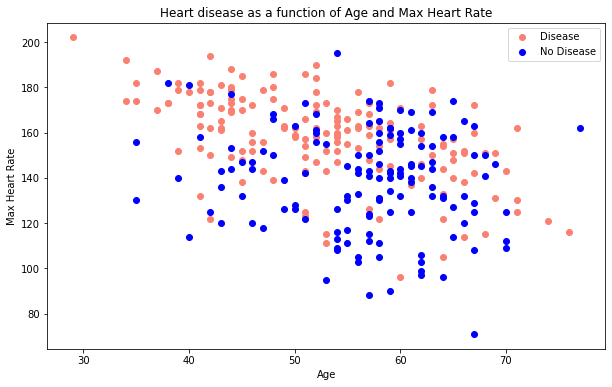

In [23]:
#Create another figure
plt.figure(figsize=(10, 6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1], color="salmon")

#Scatter with negattive examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0], color="blue")

#add some information to the figure
plt.title("Heart disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

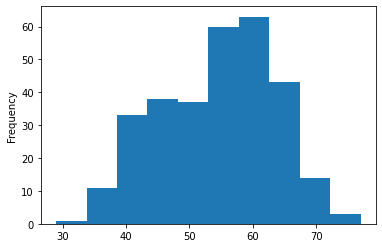

In [24]:
#Check the Distribution of the Age column
df.age.plot.hist();

### Heart Disease Frequency Per Chest Pain
3. cp: chest pain type: 
   * Value 1: typical angina 
   * Value 2: atypical angina 
   * Value 3: non-anginal pain 
   * Value 4: asymptomatic

In [29]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


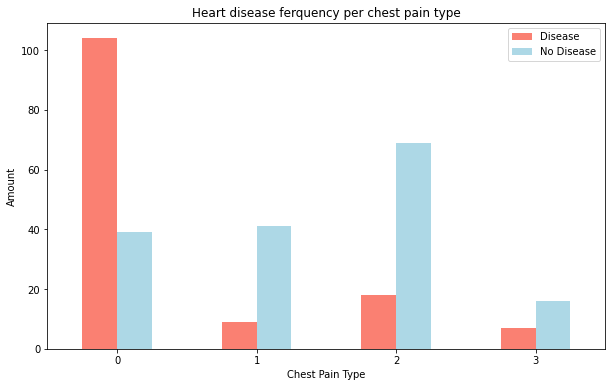

In [35]:
#Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.xticks(rotation=0)

plt.title("Heart disease ferquency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation=0);

In [36]:
#Make a Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


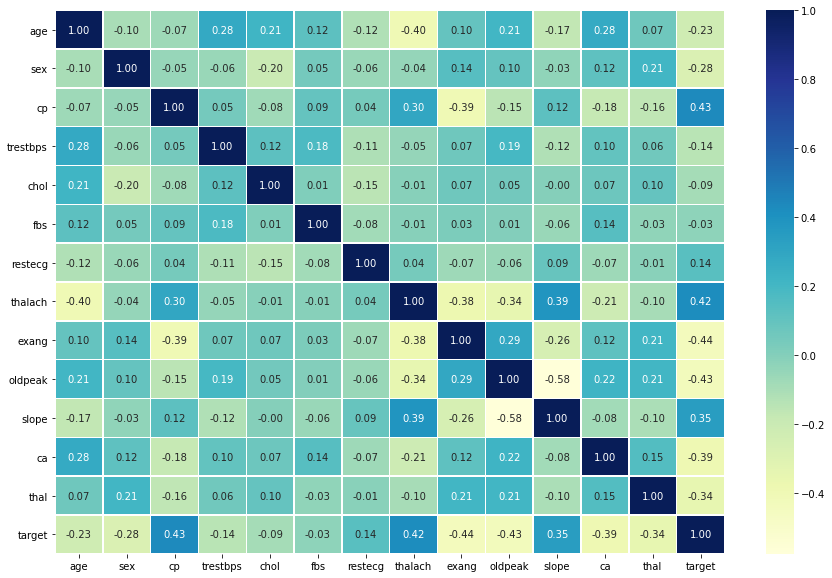

In [37]:
#let's make it a little more prettier
corr_matrix =df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu")

## Modeling

In [6]:
#split data into x and y
x = df.drop("target", axis=1)
y = df["target"]

In [40]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [41]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
#split data into train and test set
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Now we've split our data into train and test sets, it is time to uild our machine learning model

We'll train it(find the patterns) on the traininf sets

and we"ll test it (using the the patterns) on the test sets

We are going to try three different machine learning model

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [8]:
#Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest:": RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate a given machine learning model.
    models: a dictionary of differen sklearn machine learning models
    x_train: training data(no labels)
    x_test: testing data(no labels)
    y_train: training lables
    y_test: test labels
    """
    #set random seed
    np.random.seed(42)
    # make a dictionary to keep models scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #fit the model
        model.fit(x_train, y_train)
        #Evaluate the model and append the score to model_score
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [9]:
model_scores = fit_and_score(models=models, 
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\FRINICT\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest:': 0.8360655737704918}

### Model Comparison

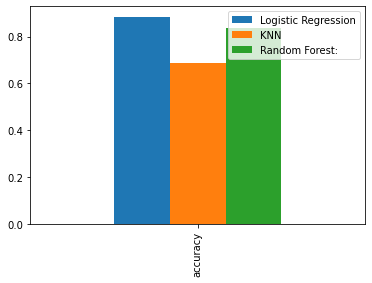

In [7]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot.bar();

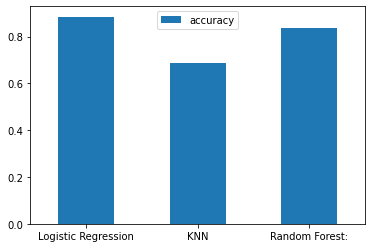

In [11]:
model_compare.T.plot(kind="bar")
plt.xticks(rotation=0);

Now we've got a baseline model. but we know a model's first prediction
aren't what we shoul base our next steps on.
So what should we do?

let's look at the following

* Hyperparemeter tuning
* Feature importance
* Confusion Matrix
* Cross validation
* Prescison
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)

### Hyperparameter tunning (By Hand)

In [11]:
#Let's train KNN
train_scores = []
test_scores = []

#Create range of different values for n_neighbors
neighbors = range(1, 21)

#setup KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #fit the algorithm
    knn.fit(x_train, y_train)
    
    #Update the training score list
    train_scores.append(knn.score(x_train, y_train))
    
    #Update the test score list
    test_scores.append(knn.score(x_test, y_test))


In [12]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [13]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score of the test data:75.41%


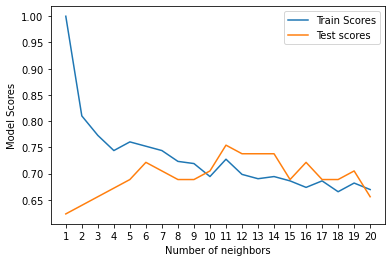

In [15]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Scores")
plt.legend()

print(f'Maximum KNN score of the test data:{max(test_scores)*100:.2f}%')

**Even after tuning the parameters of KNN it still did not measure up to the performance of Logistic Regression**
**and RandomForestClassifier.So we will discard KNN  for now**

### Hyperparameter Tuning with RandomizedSearchCV
We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [16]:
# Create a hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid ={"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

now we've got the hyperparameters grid setup for our models, Let's tune them using
RandomizedSearchCV

In [19]:
#Tune Logistic Regression Model
np.random.seed(42)

#setup random parameter search for logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameter serach model for LogisticRegression
rs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
#to check for the best parameter combinations
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [21]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

**The tuning on LogisticRegression did not change the initial performance. Now let's tune RandomForesClassifier**

In [22]:
#Tune RandomForestClassifier Model
np.random.seed(42)

#setup random parameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameter serach model for randomForestClassifier
rs_rf.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [26]:
#find the best parameter conbinations
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [27]:
#Evaluate the model
rs_rf.score(x_test, y_test)

0.8688524590163934

**there is an improvement on the random forest classifier model performance. However the logistic Regression model still**
**performed better than it. So we will now use GridSearchCV to tune Logistic Regression**

In [29]:
#Tuning the Hyperparameters of Logistic Regression Using GridSearchCV

# Create a hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

#Tune Logistic Regression Model
np.random.seed(42)

#setup random parameter search for logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=True)

#Fit random hyperparameter serach model for LogisticRegression
gs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [30]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [31]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating our tuned Machine Laerning classifier beyond Accuracy
* ROC Curve and AUC score
* Confusion Matrix
* Classification report
* Precision 
* Recall
* F1 score

... would be great if cross validation was used where possible

**To make comparisons and evaluate our tuned model, first we need to make some predictions


In [32]:
#Make Predictions with tuned model
y_preds = rs_log_reg.predict(x_test)

In [33]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [34]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\Users\FRINICT\Desktop\heart_disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


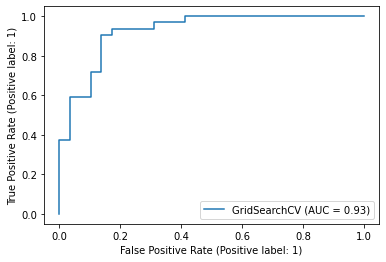

In [36]:
#Plot ROC curve and Calculate AUC metrics
plot_roc_curve(gs_log_reg, x_test, y_test);

In [37]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]
